# Project Title: Weather Time Series Analysis and Temperature Prediction

## Meera S

## Organization: Entri Elevate

## Date:28/05/2000

### Problem Statement

The goal of this project is to develop a predictive model that accurately forecasts temperature
based on weather data from the dataset. By analyzing various weather features, the model aims
to predict temperature with high accuracy.


### Expected Outcome

Develop a model that accurately predicts temperature with low error rates. The expected
outcome includes detailed exploratory data analysis, preprocessing steps, model training, and
evaluation metrics.


Target variable: T (degC) 
Features:T (degC), rh (%), p (mbar), VPmax (mbar), Tpot (K), Tdew (degC), VPact
(mbar), VPdef (mbar), sh (g/kg), H2OC (mmol/mol), rho (g/m**3), wv (m/s), max. wv (m/s), wd
(deg).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [3]:
data = pd.read_csv('max_planck_weather_ts.csv')

In [4]:
# Display the first few rows
print(data.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB
None


In [17]:
print(data.describe())

            p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean      989.212776       9.450147     283.492743       4.955854   
std         8.358481       8.423365       8.504471       6.730674   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean       76.008259      13.576251       9.533756       4.042412   
std        16.476175       7.739020       4.184164       4.896851   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.7800

### Data Preprocessing

In [18]:
# Check for missing values
print(data.isnull().sum())

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


In [5]:
# Check for duplicated values
data[data.duplicated()]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
78766,01.07.2010 00:10:00,992.06,17.87,291.69,14.06,78.40,20.50,16.07,4.43,10.14,16.20,1180.21,0.31,0.56,51.11
78767,01.07.2010 00:20:00,992.02,17.82,291.65,14.03,78.50,20.44,16.04,4.39,10.12,16.17,1180.38,0.23,0.48,52.64
78768,01.07.2010 00:30:00,992.04,17.92,291.75,14.09,78.30,20.57,16.10,4.46,10.16,16.23,1179.97,0.18,0.40,22.10
78769,01.07.2010 00:40:00,991.96,17.82,291.65,14.02,78.40,20.44,16.02,4.41,10.11,16.15,1180.32,0.19,0.40,354.80
78770,01.07.2010 00:50:00,991.90,17.54,291.38,13.96,79.50,20.08,15.96,4.12,10.07,16.10,1181.41,0.24,0.98,21.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274743,21.03.2014 16:40:00,980.50,18.62,293.43,4.58,39.45,21.49,8.48,13.01,5.40,8.65,1166.81,8.79,13.49,213.40
274744,21.03.2014 16:50:00,980.52,18.30,293.10,4.67,40.48,21.07,8.53,12.54,5.43,8.70,1168.09,7.98,12.33,215.00
274745,21.03.2014 17:00:00,980.74,18.15,292.93,4.79,41.22,20.87,8.60,12.27,5.47,8.77,1168.92,5.35,8.81,215.70
274746,21.03.2014 17:10:00,980.97,18.01,292.77,4.88,41.85,20.69,8.66,12.03,5.51,8.82,1169.73,3.37,5.88,219.40


In [8]:
# Dealing with Duplicate Data
data.drop_duplicates(inplace=True)

In [9]:
# After removing duplicated values
data[data.duplicated()]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)


In [10]:
# Convert 'Date Time' to datetime object
data['Date Time'] = pd.to_datetime(data['Date Time'])

### Outlier Detection and Treatment

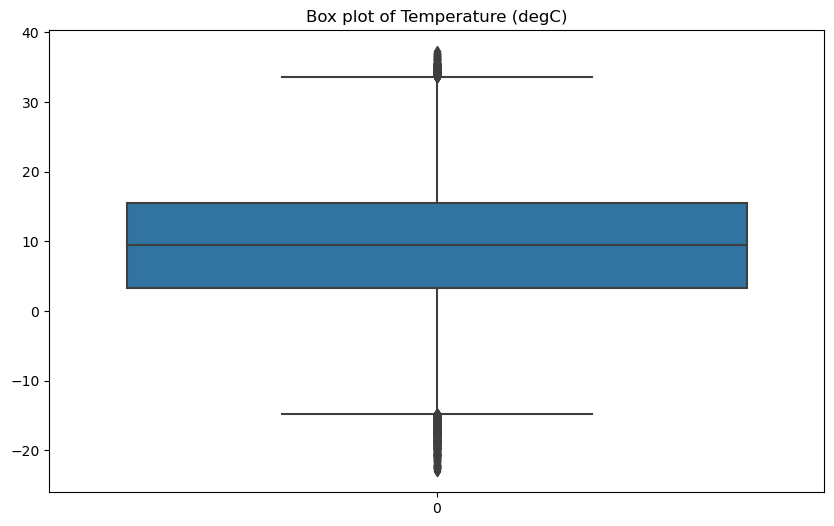

In [11]:
# Box plot to detect outliers in 'T (degC)'
plt.figure(figsize=(10, 6))
sns.boxplot(data['T (degC)'])
plt.title('Box plot of Temperature (degC)')
plt.show()

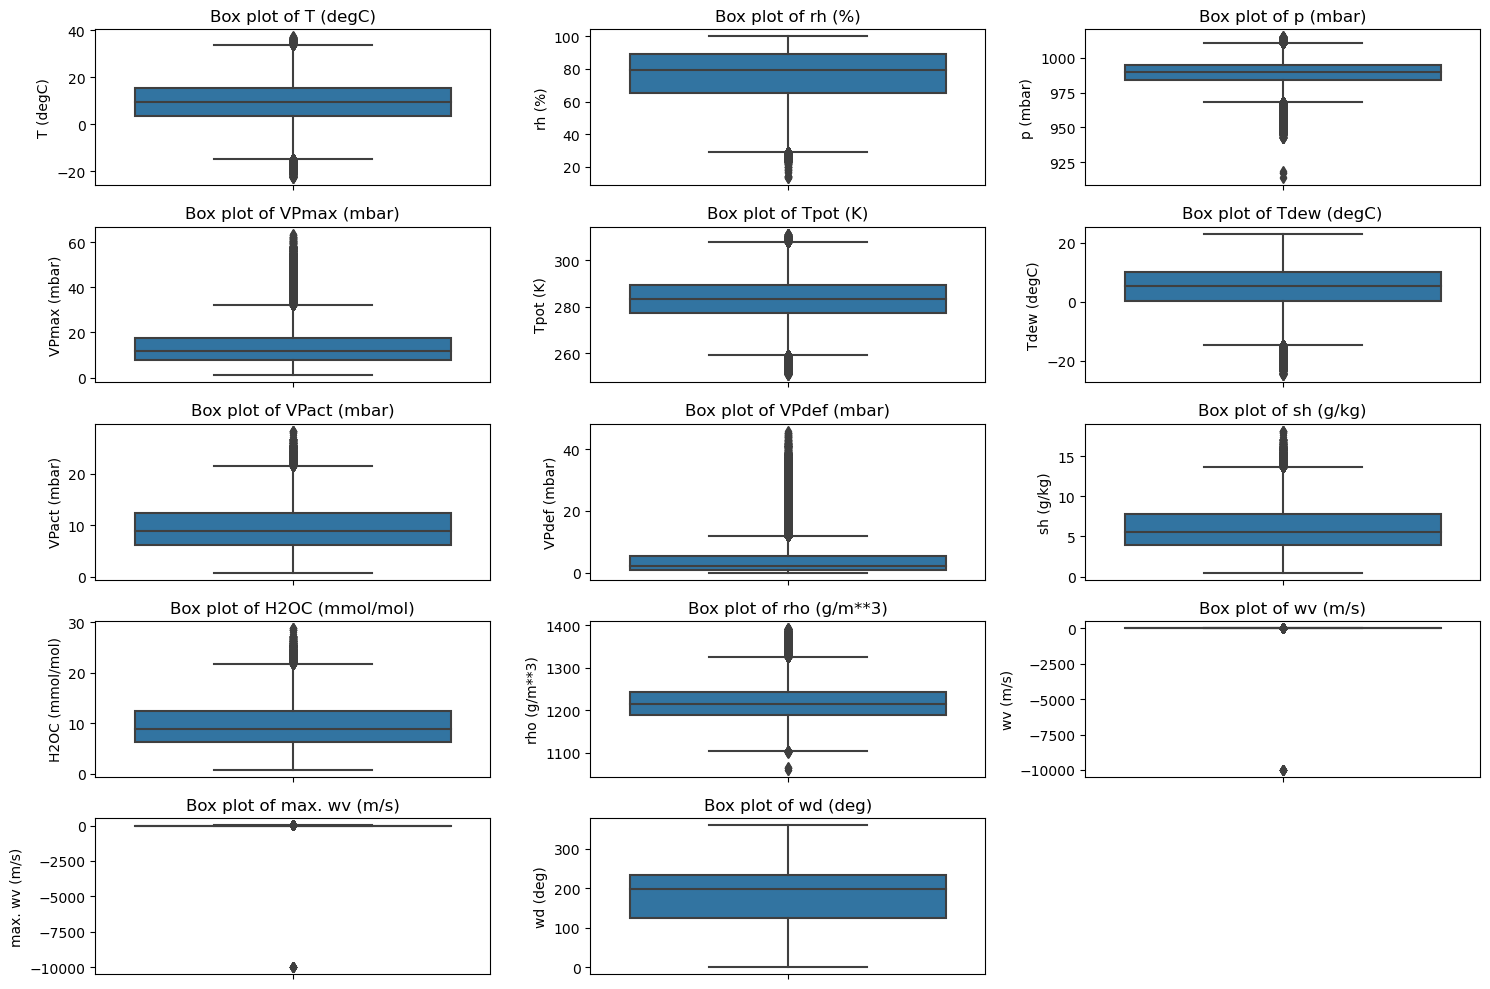

In [16]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

In [18]:
# Remove extreme outliers (for example, using IQR method)
Q1 = data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']].quantile(0.25)
Q3 = data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to exclude outliers
filter = (data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']] >= (Q1 - 1.5 * IQR)) & (data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']] <= (Q3 + 1.5 * IQR))
data_filtered = data[filter.all(axis=1)]


<Axes: >

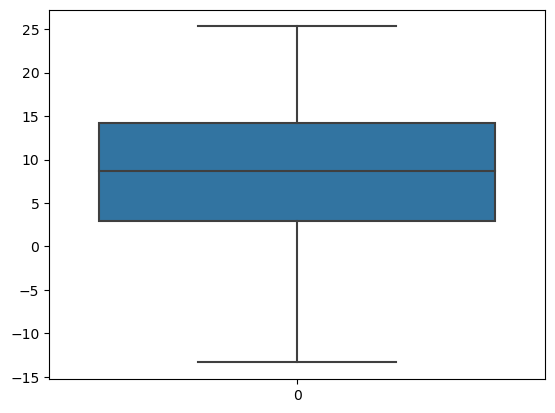

In [25]:
# Box plot after removing outliers in 'T (degC)'
sns.boxplot(data_filtered['T (degC)'])

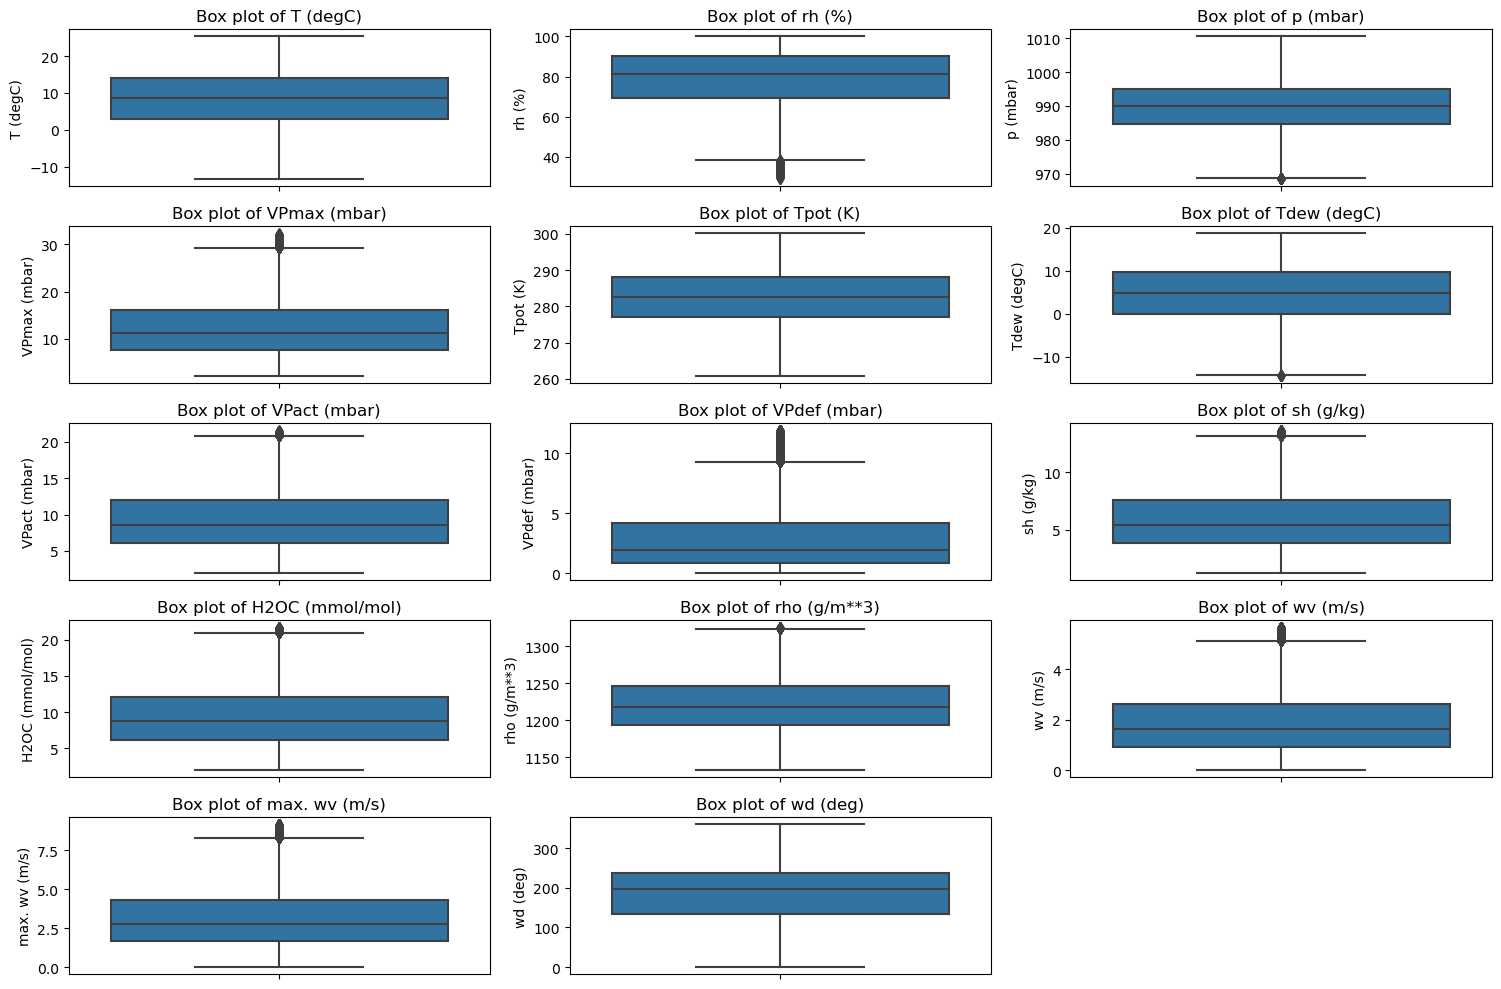

In [19]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

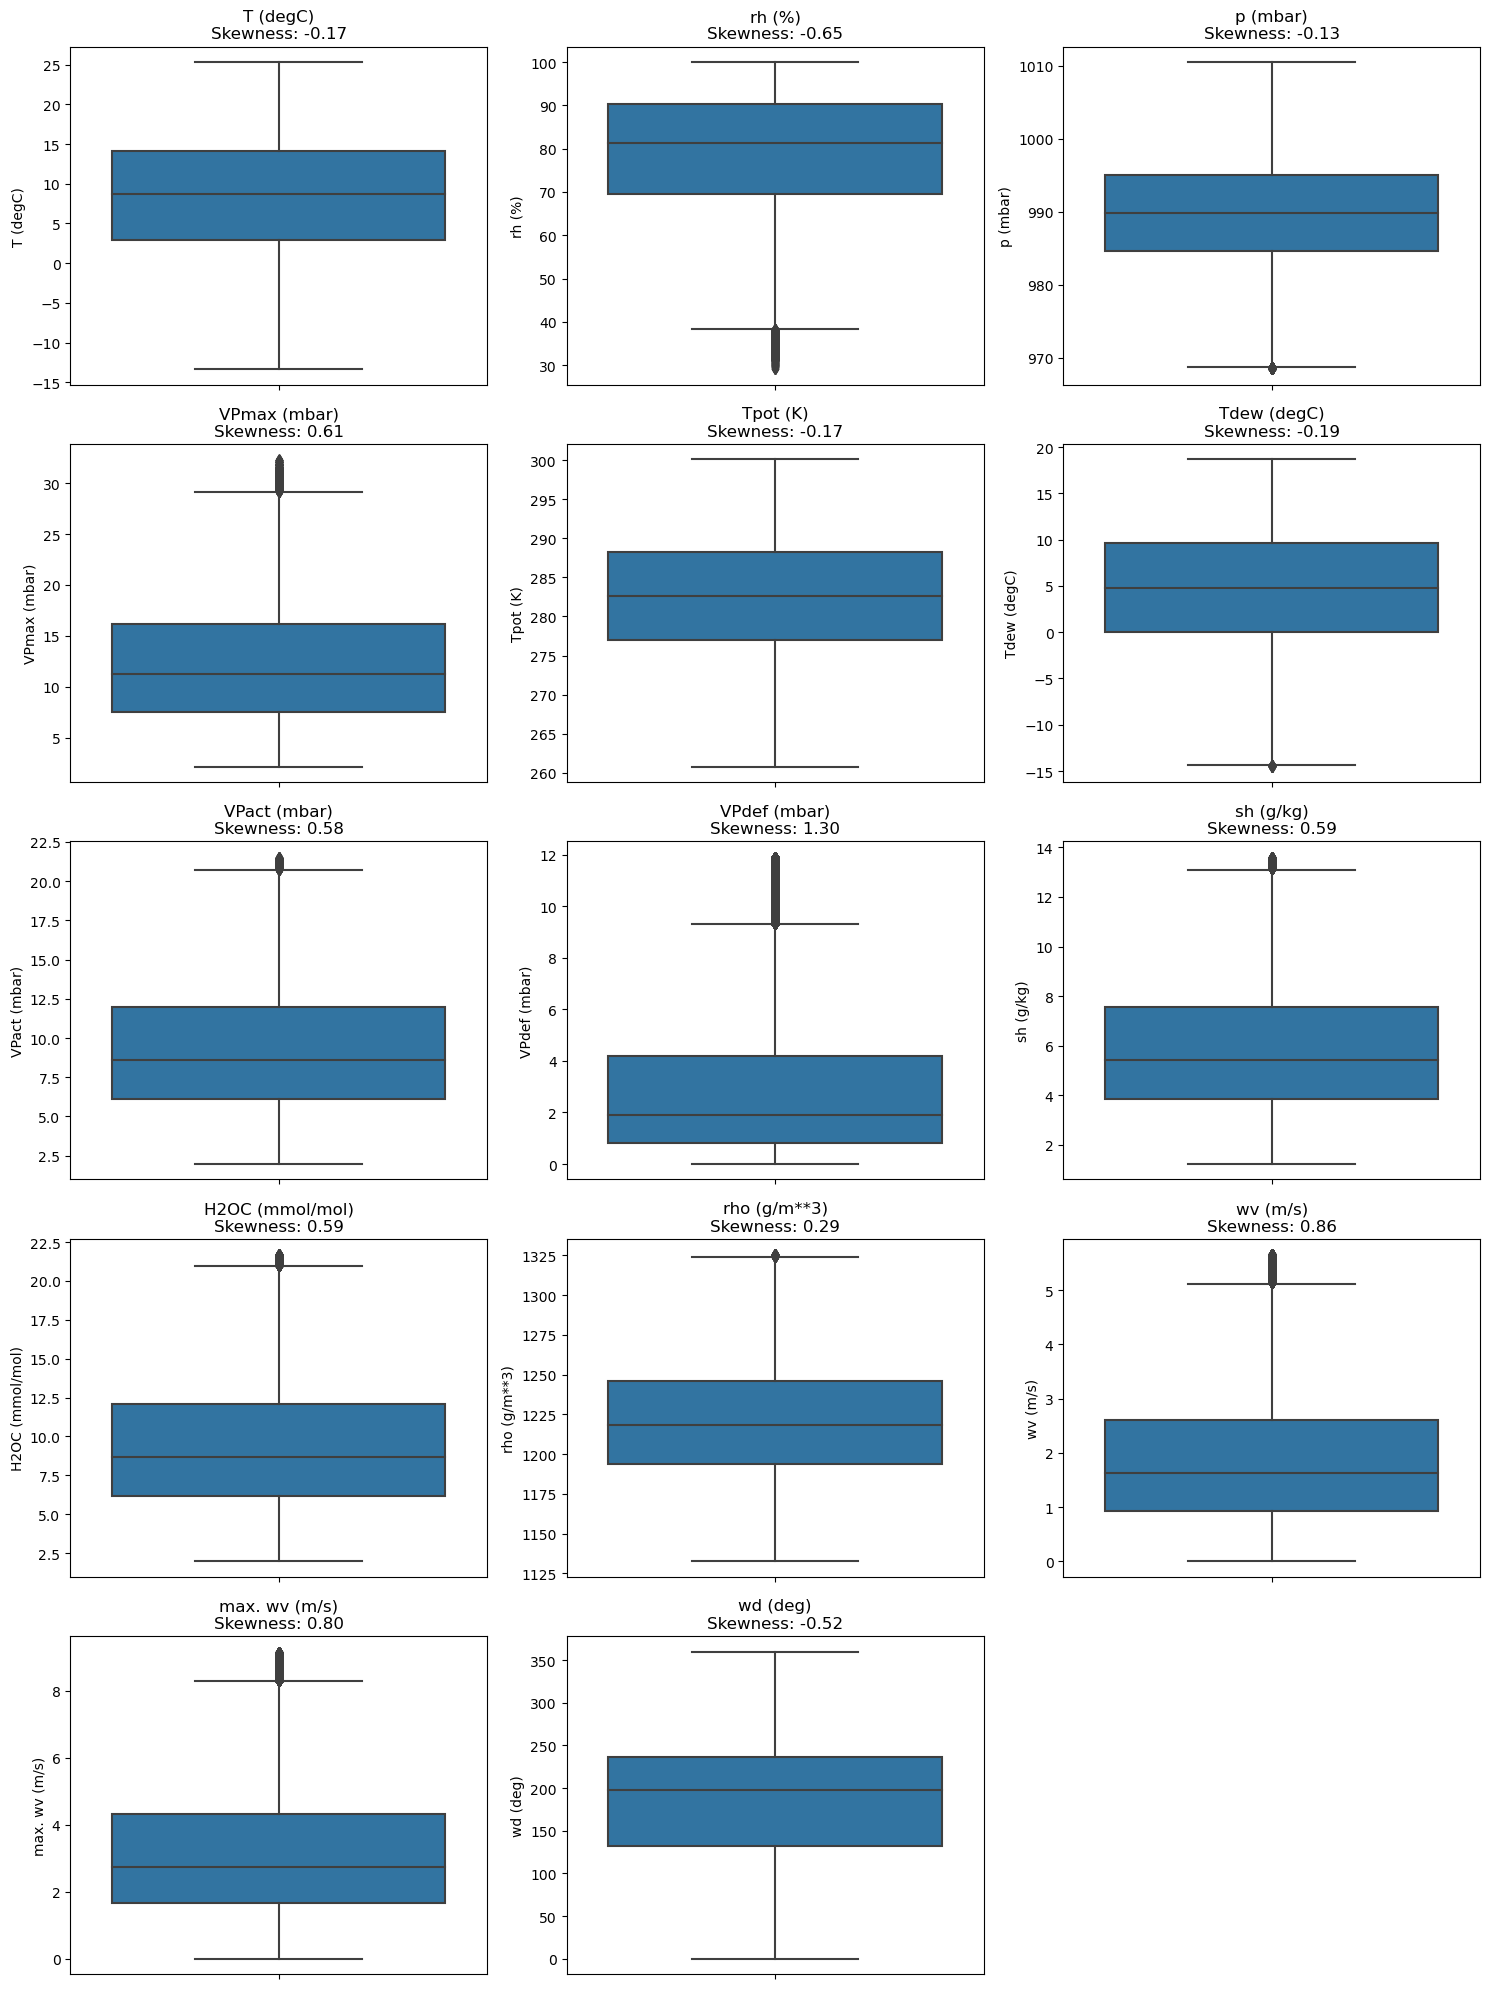

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots and calculate skewness for each feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'{feature}\nSkewness: {skew(data_filtered[feature]):.2f}')

plt.tight_layout()
plt.show()


In [28]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

for feature in features:
    data_filtered[f'log_{feature}'] = np.log1p(data_filtered[feature])
    skewness = skew(data_filtered[feature])
    log_skewness = skew(data_filtered[f'log_{feature}'])
    print(f"{feature} - Original Skewness: {skewness:.2f}, Log Skewness: {log_skewness:.2f}")

C:\Users\jayaa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jayaa\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\jayaa\AppData\Local\Temp\ipykernel_16028\936648950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'log_{feature}'] = np.log1p(data_filtered[feature])


T (degC) - Original Skewness: -0.17, Log Skewness: nan
rh (%) - Original Skewness: -0.65, Log Skewness: -1.09
p (mbar) - Original Skewness: -0.13, Log Skewness: -0.15
VPmax (mbar) - Original Skewness: 0.61, Log Skewness: -0.19
Tpot (K) - Original Skewness: -0.17, Log Skewness: -0.22
Tdew (degC) - Original Skewness: -0.19, Log Skewness: nan
VPact (mbar) - Original Skewness: 0.58, Log Skewness: -0.19
VPdef (mbar) - Original Skewness: 1.30, Log Skewness: 0.31
sh (g/kg) - Original Skewness: 0.59, Log Skewness: -0.13
H2OC (mmol/mol) - Original Skewness: 0.59, Log Skewness: -0.19
rho (g/m**3) - Original Skewness: 0.29, Log Skewness: 0.23
wv (m/s) - Original Skewness: 0.86, Log Skewness: 0.10
max. wv (m/s) - Original Skewness: 0.80, Log Skewness: -0.02
wd (deg) - Original Skewness: -0.52, Log Skewness: -1.87


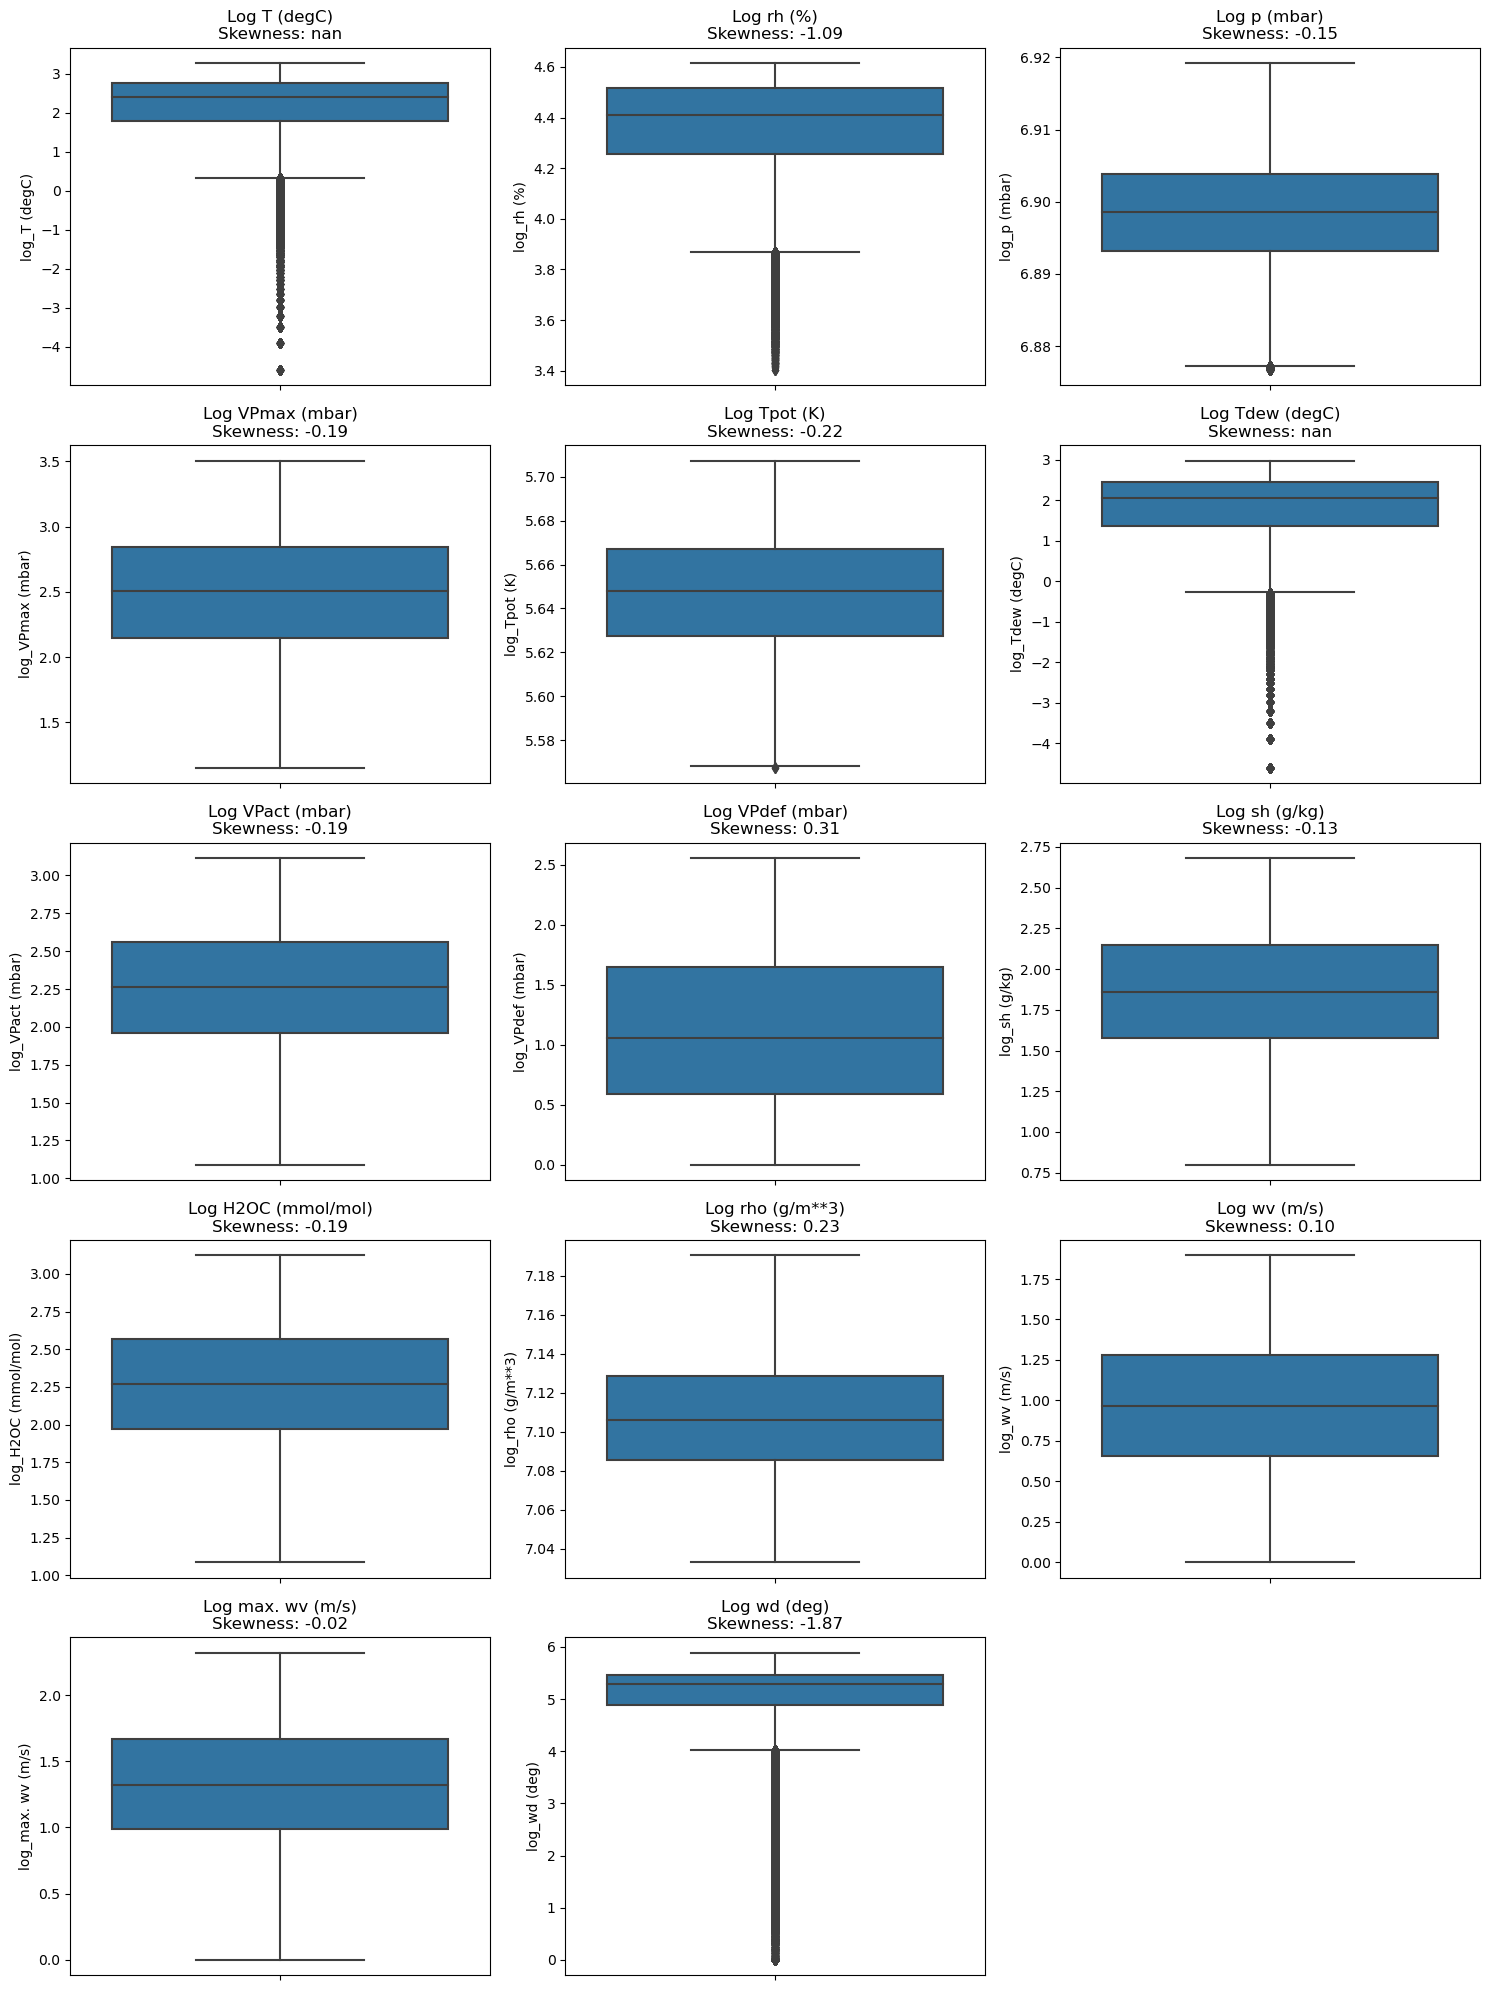

In [29]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust layout based on the number of features
    sns.boxplot(y=data_filtered[f'log_{feature}'])
    plt.title(f'Log {feature}\nSkewness: {skew(data_filtered[f"log_{feature}"]):.2f}')

plt.tight_layout()
plt.show()


### Visualizations

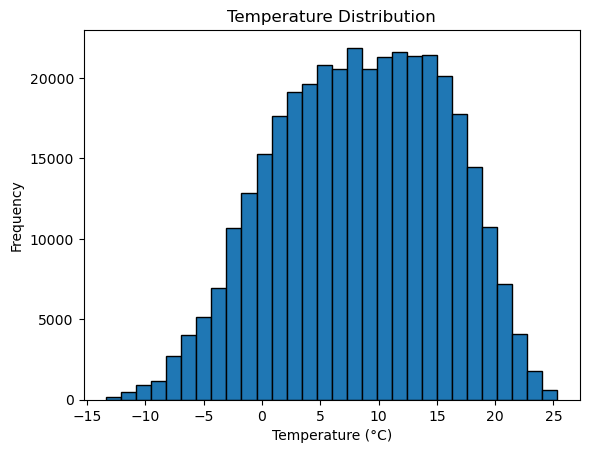

In [20]:
# Histogram of Temperature
plt.hist(data_filtered['T (degC)'], bins=30, edgecolor='k')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

C:\Users\jayaa\AppData\Local\Temp\ipykernel_7220\3775879646.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm')


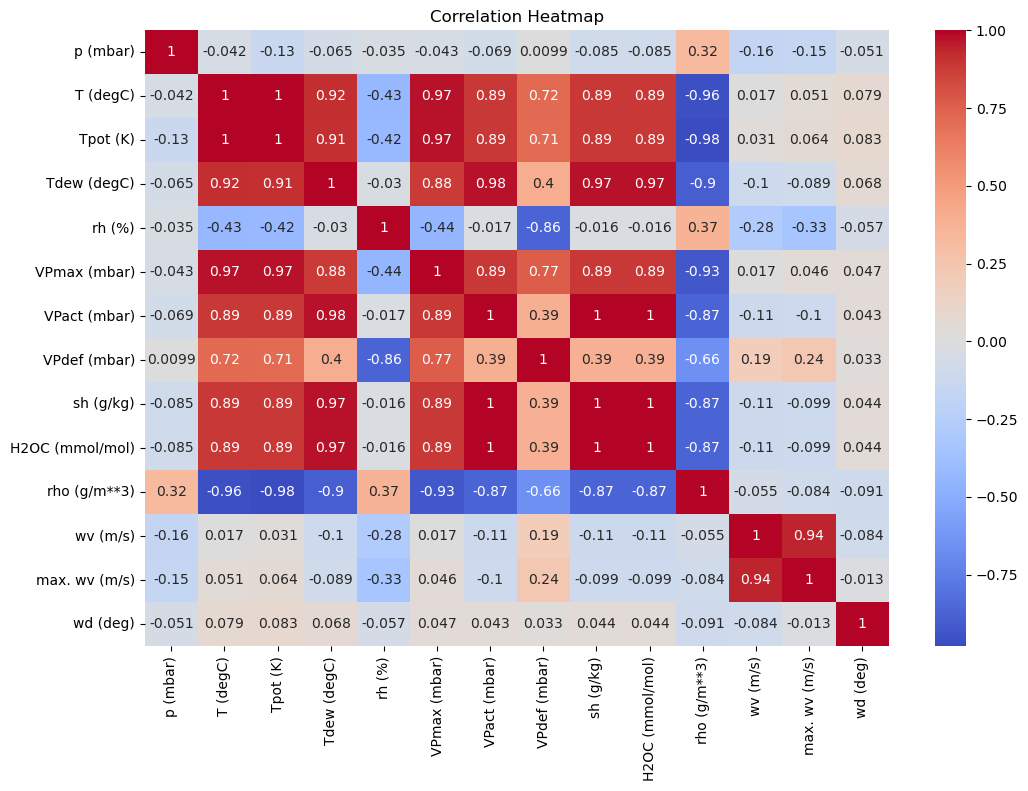

In [27]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

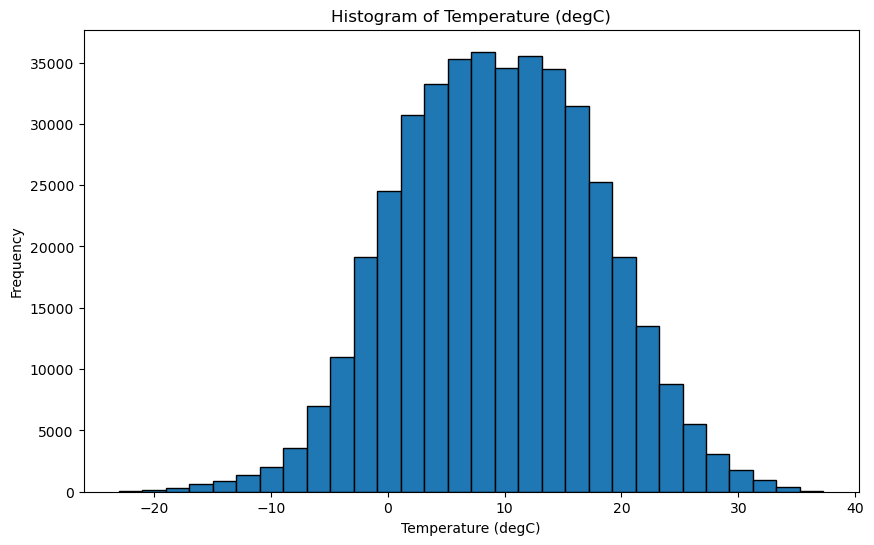

In [28]:
# Histogram of Temperature
plt.figure(figsize=(10, 6))
plt.hist(data['T (degC)'], bins=30, edgecolor='k')
plt.title('Histogram of Temperature (degC)')
plt.xlabel('Temperature (degC)')
plt.ylabel('Frequency')
plt.show()

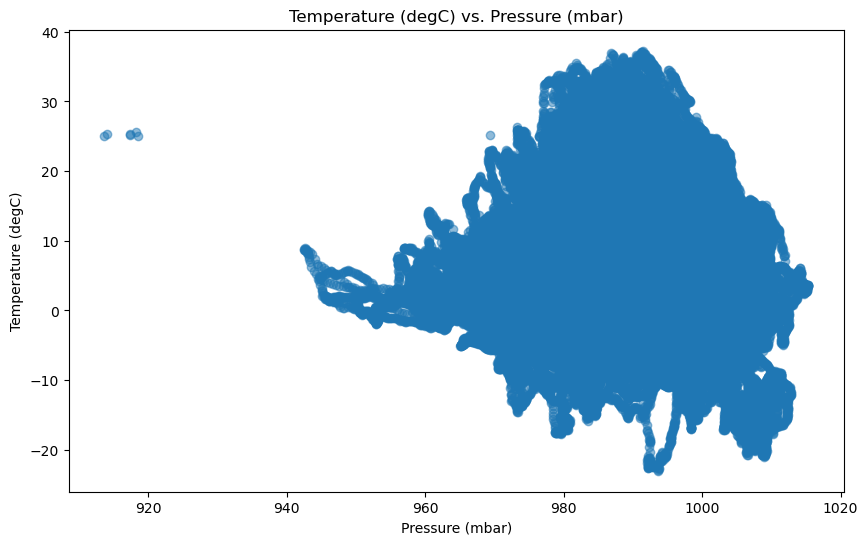

In [29]:
# Scatter plot of Temperature vs. Pressure
plt.figure(figsize=(10, 6))
plt.scatter(data['p (mbar)'], data['T (degC)'], alpha=0.5)
plt.title('Temperature (degC) vs. Pressure (mbar)')
plt.xlabel('Pressure (mbar)')
plt.ylabel('Temperature (degC)')
plt.show()

C:\Users\jayaa\AppData\Local\Temp\ipykernel_7220\2516538713.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


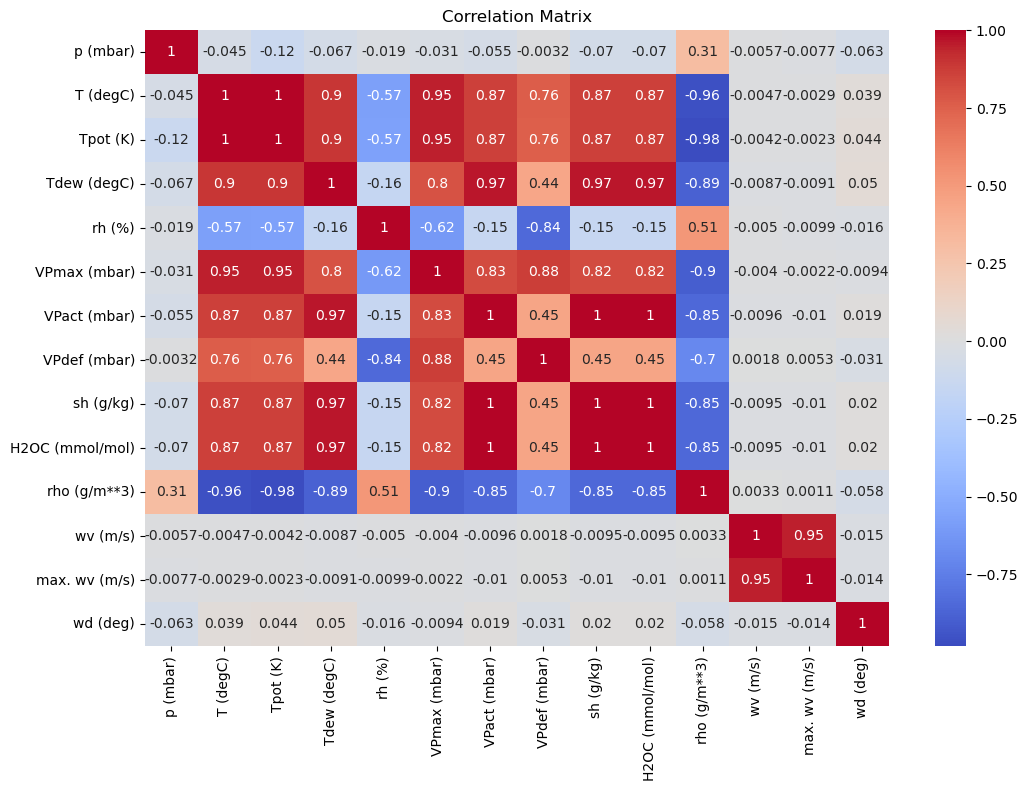

In [30]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

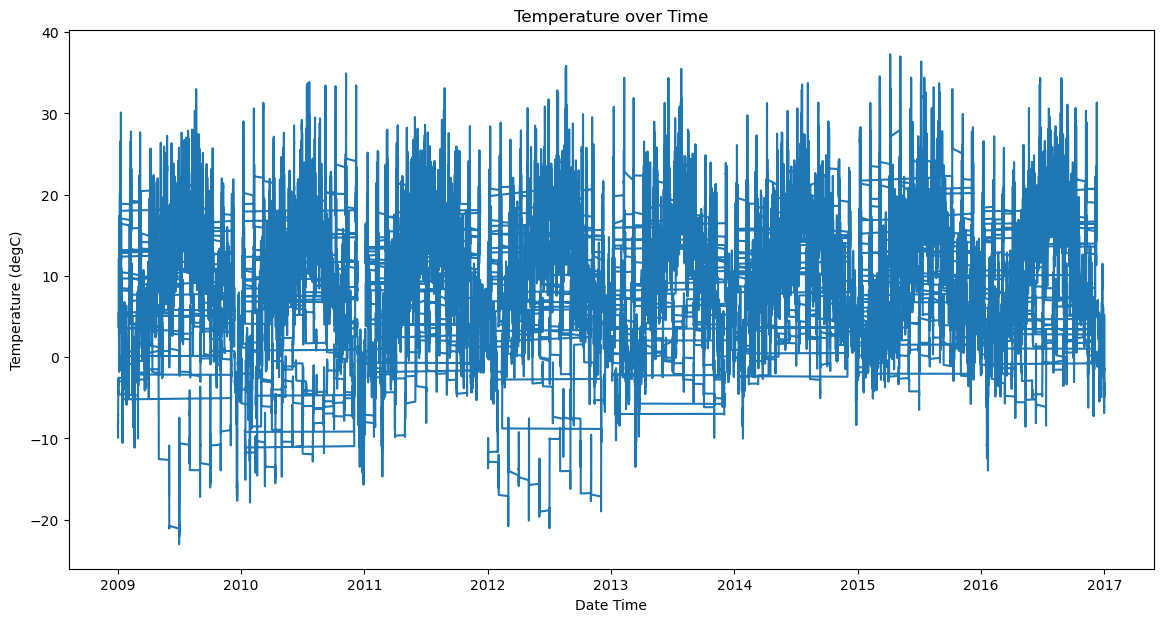

In [31]:
# Plot time series data
plt.figure(figsize=(14, 7))
plt.plot(data['Date Time'], data['T (degC)'])
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature over Time')
plt.show()


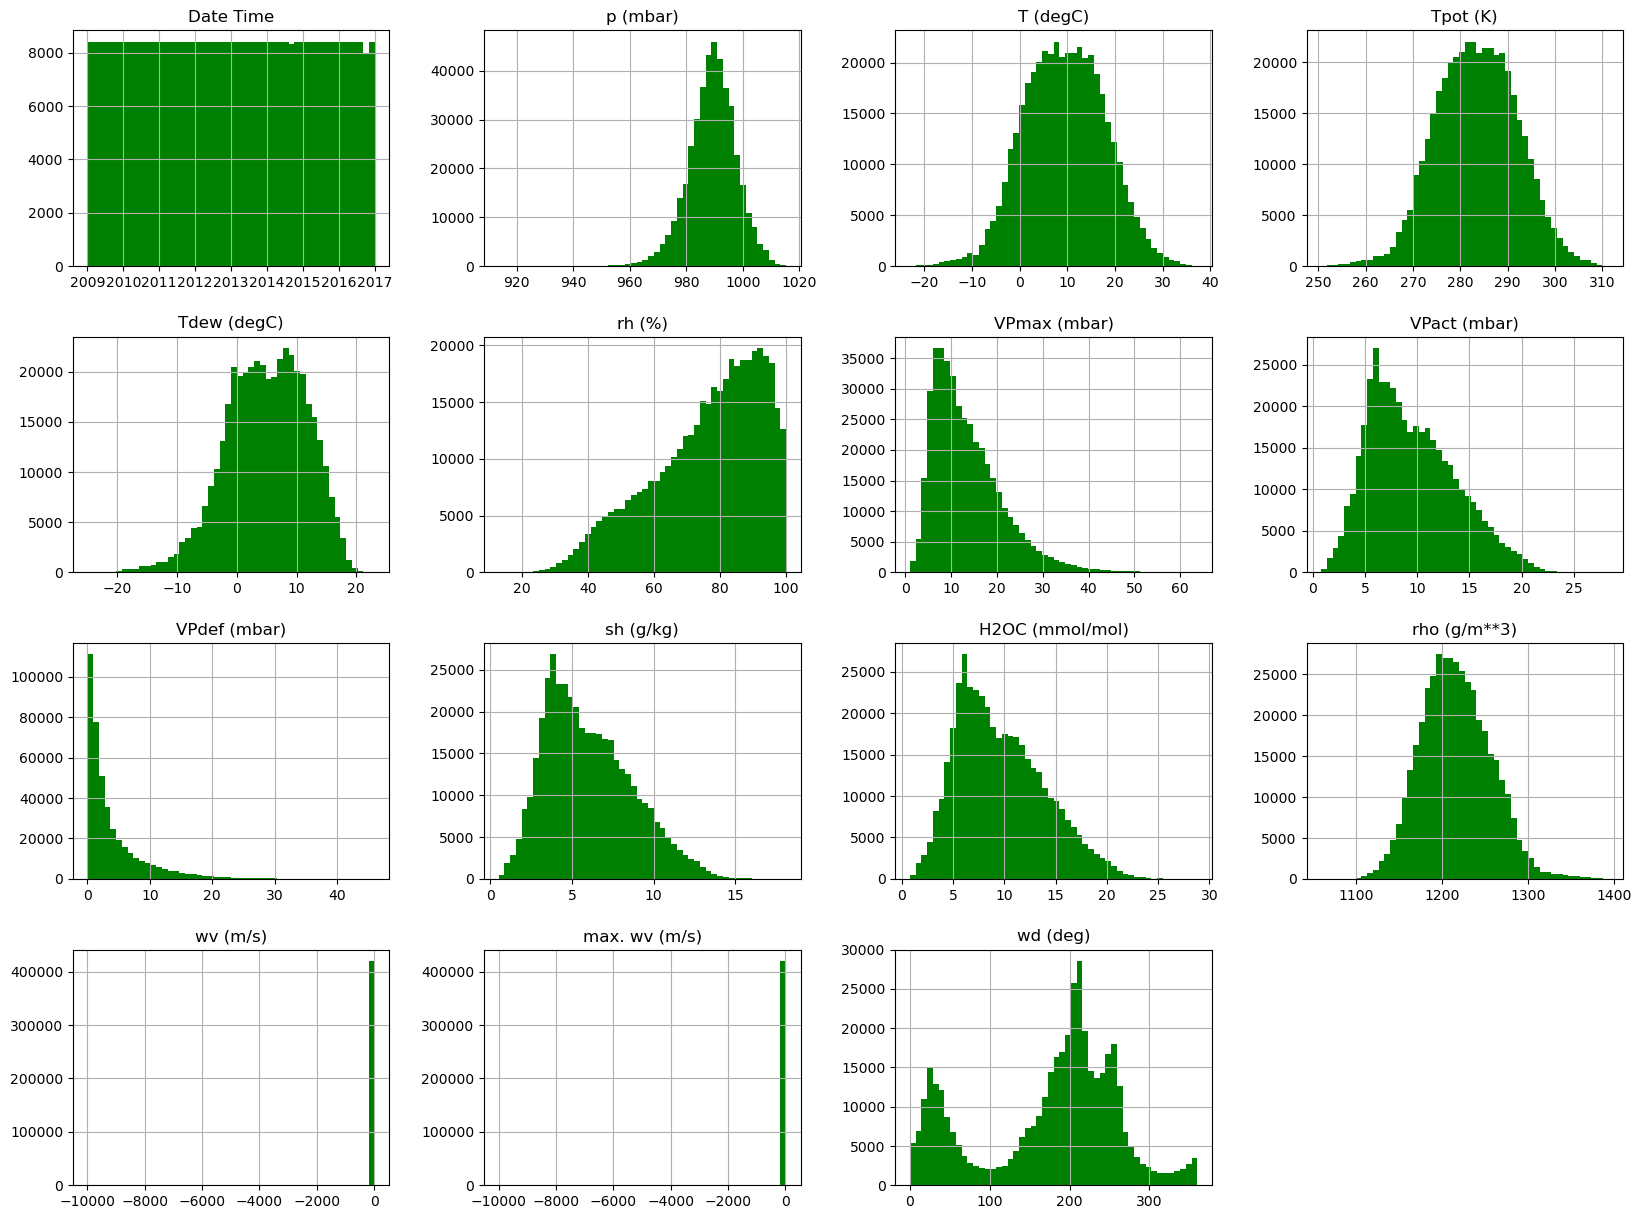

In [13]:
data.hist(bins=50,color = 'green', figsize=(20,15))
plt.show()

### Feature Scaling/Normalization

In [26]:
# Normalize or standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['Date Time']))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[1:])

### Data Splitting

In [33]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['T (degC)'])
y = data_scaled['T (degC)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


### Model Prediction

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


### Model Evaluation

In [26]:
# Evaluation
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

lr_mse, lr_mae, lr_r2 = evaluate_model(lr_predictions, y_test)
dt_mse, dt_mae, dt_r2 = evaluate_model(dt_predictions, y_test)
rf_mse, rf_mae, rf_r2 = evaluate_model(rf_predictions, y_test)

print(f"Linear Regression - MSE: {lr_mse}, MAE: {lr_mae}, R2: {lr_r2}")
print(f"Decision Tree - MSE: {dt_mse}, MAE: {dt_mae}, R2: {dt_r2}")
print(f"Random Forest - MSE: {rf_mse}, MAE: {rf_mae}, R2: {rf_r2}")

Linear Regression - MSE: 1.2151912704973938e-06, MAE: 0.0007693013710332537, R2: 0.9999987808170275
Decision Tree - MSE: 7.313324774248739e-07, MAE: 0.00039265087087461047, R2: 0.9999992662652165
Random Forest - MSE: 4.092151800505492e-07, MAE: 0.0003441660474515627, R2: 0.9999995894406158


In [ ]:
# Hyperparameter tuning (example with RandomForest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse, best_rf_mae, best_rf_r2 = evaluate_model(best_rf_predictions, y_test)

print(f"Best Random Forest - MSE: {best_rf_mse}, MAE: {best_rf_mae}, R2: {best_rf_r2}")

In [ ]:
# Make predictions with the best model
final_predictions = best_rf_model.predict(X_test)

In [ ]:
# Visualize the forecasted results
plt.figure(figsize=(14, 7))
plt.plot(df['Date Time'][-len(y_test):], y_test, label='Actual')
plt.plot(df['Date Time'][-len(y_test):], final_predictions, label='Predicted')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

### Model Deployment

In [ ]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the model
loaded_model = joblib.load('best_rf_model.pkl')

# Predict with the loaded model
final_predictions = loaded_model.predict(X_test)

### Visualization of Forecasted Results

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date Time'][-len(y_test):], y_test, label='Actual')
plt.plot(data['Date Time'][-len(y_test):], final_predictions, label='Predicted')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()
